In [1]:
from __future__ import division
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import gridspec
import copy
from tqdm import tqdm

from EightBitTransit.cTransitingImage import TransitingImage
from EightBitTransit.inversion import *
from EightBitTransit.misc import *

%matplotlib inline

/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:9: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
  if __name__ == '__main__':
/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:13: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.
  del sys.path[0]


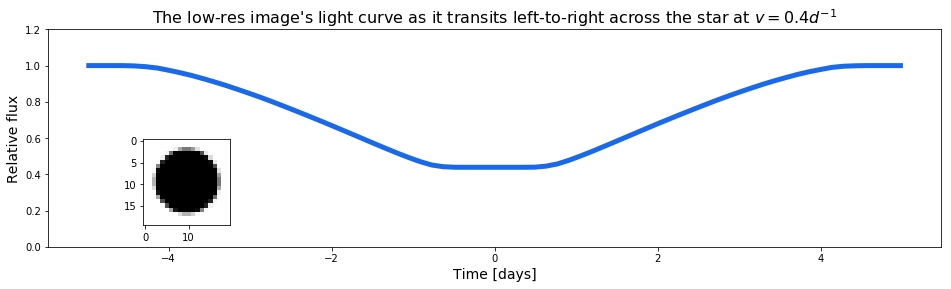

/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:54: DeprecationWarning: `imread` is deprecated!
`imread` is deprecated in SciPy 1.0.0, and will be removed in 1.2.0.
Use ``imageio.imread`` instead.
/Users/piperfrances/anaconda3/envs/py2/lib/python2.7/site-packages/ipykernel_launcher.py:58: DeprecationWarning: elementwise comparison failed; this will raise an error in the future.


In [19]:
# the 1.png image is a standard planet
times = np.linspace(-35.,35.,500)
planet_lowres_SItitle = TransitingImage(imfile="/Users/piperfrances/BSRC/code/subtract_artifacts/1.png",
                                    lowres=20,
                                    lowrestype="mean", # Calculate the lower-resolution version of the image by averaging "neighborhoods" of pixels in the high-res image.
                                    lowresround=False, # Let the resulting low-res pixel values take on intermediate values between 0 and 1, i.e. don't round them to 0 or 1.
                                    v=0.4,
                                    t_ref=0.,
                                    t_arr=times)
#lowres_SItitle.plot_grid()
#print np.shape(lowres_SItitle.opacitymat)
    
planet_lowres_SItitle_LC, overlapTimes = planet_lowres_SItitle.gen_LC(t_arr=times) 
    
fig, ax = plt.subplots(1,1,figsize=(16,4))
ax = plt.axes()
ax.plot(overlapTimes,planet_lowres_SItitle_LC,color="#1969ea",ls="-",lw=5)
ax.set_ylim(0.0,1.2)
plt.xlabel("Time [days]",fontsize=14)
plt.ylabel("Relative flux",fontsize=14)
plt.title(r"The low-res image's light curve as it transits left-to-right across the star at $v = 0.4 d^{-1}$",fontsize=16)
ax1 = plt.axes([.095, .2, 0.3, 0.3])
ax1.imshow(planet_lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
filename = "/Users/piperfrances/BSRC/code/results_subtract_artifacts/1"
plt.savefig(filename, fmt="png")
plt.show()
plt.close()



i = 2
# subtract_artifacts has 8
while i < 9:
    times = np.linspace(-35.,35.,500)

    # create a TransitingImage object, which reads in an image file and converts it into a matrix of pixels
    # transiting the star at velocity v [days**-1], with reference time t_ref [days]
#     SItitle = TransitingImage(imfile="/Users/piperfrances/BSRC/EightBitTransit/names/"+str(i)+".png",
#                               v=0.4,
#                               t_ref=0.,
#                               t_arr=times)
    #SItitle.plot_grid()
    #print np.shape(SItitle.opacitymat) # the pixelated image grid. Notice that this is very high-resolution, so the 
                                       # light curve calculation in the next cell would be slow.

    # We can speed up the light curve calculation by specifying a lower image resolution, e.g. 20 pixels in height.
    # The image aspect ratio will not change.
    lowres_SItitle = TransitingImage(imfile="/Users/piperfrances/BSRC/code/subtract_artifacts/"+str(i)+".png",
                                     lowres=20,
                                     lowrestype="mean", # Calculate the lower-resolution version of the image by averaging "neighborhoods" of pixels in the high-res image.
                                     lowresround=False, # Let the resulting low-res pixel values take on intermediate values between 0 and 1, i.e. don't round them to 0 or 1.
                                     v=0.4,
                                     t_ref=0.,
                                     t_arr=times)
    #lowres_SItitle.plot_grid()
    #print np.shape(lowres_SItitle.opacitymat)
    
    lowres_SItitle_LC, overlapTimes = lowres_SItitle.gen_LC(t_arr=times) 
    
    fig, ax = plt.subplots(1,1,figsize=(16,4))
    ax = plt.axes()
    ax.plot(overlapTimes,lowres_SItitle_LC,color="#1969ea",ls="-",lw=5)
    ax.set_ylim(0.0,1.2)
    plt.xlabel("Time [days]",fontsize=14)
    plt.ylabel("Relative flux",fontsize=14)
    plt.title(r"The low-res image's light curve as it transits left-to-right across the star at $v = 0.4 d^{-1}$",fontsize=16)
    ax1 = plt.axes([.095, .2, 0.3, 0.3])
    ax1.imshow(lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
    filename = "/Users/piperfrances/BSRC/code/results_subtract_artifacts/"+str(i)
    plt.savefig(filename, fmt="png")
    #plt.show()
    plt.close()
    
    #subtracted plot
    sub_LC = lowres_SItitle_LC - planet_lowres_SItitle_LC
    
    fig1, ax3 = plt.subplots(1,1,figsize=(16,4))
    ax3 = plt.axes()
    ax3.plot(overlapTimes,sub_LC,color="red",ls="-",lw=5)
    plt.xlabel("Time [days]",fontsize=14)
    plt.ylabel("Relative flux",fontsize=14)
    plt.title(r"Subtraction of Planetary Light Curve from Artifical Light Curve across the star at $v = 0.4 d^{-1}$",fontsize=16)
    ax4 = plt.axes([.04, .2, 0.3, 0.3])
    ax4.imshow(lowres_SItitle.opacitymat,cmap="Greys",aspect="equal",origin="upper",interpolation='none',vmin=0.,vmax=1.)
    
    filename = "/Users/piperfrances/BSRC/code/results_subtract_artifacts/sub_"+str(i)
    plt.savefig(filename, fmt="png")
    #plt.show()
    plt.close()
    i += 1
    
    

array([1.        , 1.        , 1.        , 1.        , 0.9981761 ,
       0.99382552, 0.98655709, 0.97416247, 0.960545  , 0.9455028 ,
       0.92800709, 0.90975994, 0.89039479, 0.86929753, 0.84771855,
       0.82536327, 0.80180836, 0.7775323 , 0.75261567, 0.72739298,
       0.70180845, 0.67574515, 0.649267  , 0.62256767, 0.59576913,
       0.56900401, 0.54255839, 0.51663763, 0.49227772, 0.4698959 ,
       0.45144592, 0.44210266, 0.43898269, 0.43879232, 0.43879232,
       0.43879232, 0.43879232, 0.43879232, 0.43879232, 0.439399  ,
       0.44511722, 0.45737144, 0.47742489, 0.50090605, 0.52585334,
       0.5520059 , 0.57855688, 0.60533086, 0.63212938, 0.65879562,
       0.68516984, 0.71106477, 0.73645145, 0.76151913, 0.78632819,
       0.81032737, 0.83348214, 0.85555782, 0.87678856, 0.89749538,
       0.91650046, 0.93419419, 0.95126905, 0.96583999, 0.9783514 ,
       0.99004116, 0.99640958, 0.99885974, 1.        , 1.        ,
       1.        , 1.        ])